In [49]:
%pylab inline
n=15
m=60

Populating the interactive namespace from numpy and matplotlib


### Load Rascal RRR counts

In [81]:
RRR_raw=np.loadtxt('/mnt/store1/oliverphilcox/3PCF_RRR_periodic/RRR_counts_n%d_m%d_full.txt'%(n,m))

In [82]:
r_bins = np.arange(35,185,10)

In [83]:
mu_all = np.linspace(-1,1,m+1)
mu_bins = 0.5*(mu_all[1:]+mu_all[:-1])
delta_m = mu_bins[1]-mu_bins[0]

In [84]:
RRR_counts = np.zeros([n,n,m])
for i in range(len(RRR_raw)):
    bin_mu = i%m
    bin_a = (i//m)%n
    bin_b = (i//m)//n
    RRR_counts[bin_a,bin_b,bin_mu]=RRR_raw[i]/delta_m


### Load SE RRR counts

In [85]:
rrr_file = '/home/oliverphilcox/3pcf_code/codes/grid_multipoles/rand_periodic_box.out'

n_bins = 18
n_mult = 10

import re,string

start=False
RRR_mult=np.zeros([n_bins,n_bins,n_mult+1])
            
with open(rrr_file,"r") as xi_in:
    for line in xi_in:
        if not start:
            if(re.match("# Multipole power",line)):
                start=True
                continue
        if(re.match("# Total",line)):
            start=False
            continue
        if start:
            if(re.match("Multipole",line)):
                continue
            strip_line = line.strip()
            if len(strip_line)==0:
                continue
            split_line=strip_line.split()
            r1 = int(split_line[0])
            r2 = int(split_line[1])
            for i in range(n_mult+1):
                RRR_mult[r1,r2,i]=split_line[int(i+2)]
                if i>0:
                    RRR_mult[r1,r2,i]*=RRR_mult[r1,r2,0]
                RRR_mult[r2,r1,i]=RRR_mult[r1,r2,i]
RRR_mult=RRR_mult[3:,3:,:]

## Compress

In [86]:
delta_r = r_bins[1]-r_bins[0]
r_min = r_bins-delta_r/2
n=len(r_min)
min_r_bin = 4

vol_r = 4.*np.pi/3.*((r_min+delta_r)**3-r_min**3)

RRR_compress_ras = np.zeros([n-min_r_bin,m])
RRR_compress_SE = np.zeros([n-min_r_bin,n_mult+1])

denom = np.zeros([n-min_r_bin])
for b1 in range(min_r_bin,n):
    for b2 in range(0,b1-3):
        RRR_compress_ras[b1-min_r_bin,:]+=RRR_counts[b1,b2,:]*vol_r[b2]
        RRR_compress_SE[b1-min_r_bin,:]+=RRR_mult[b1,b2,:]*vol_r[b2]
        denom[b1-min_r_bin]+=vol_r[b2]
    RRR_compress_ras[b1-min_r_bin,:]/=denom[b1-min_r_bin]
    RRR_compress_SE[b1-min_r_bin,:]/=denom[b1-min_r_bin]

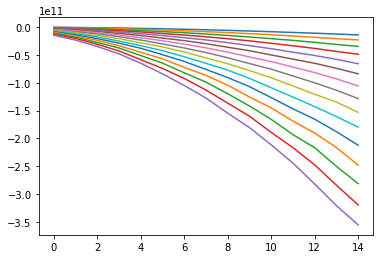

In [87]:
plt.plot(RRR_counts[:,:,0])

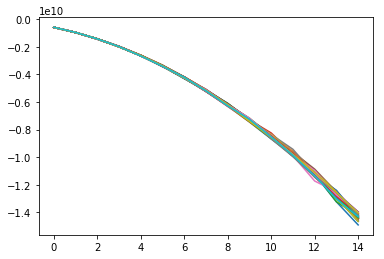

In [88]:
plt.plot(RRR_counts[0]);

### Convert SE multipoles into mu binning:

In [89]:
from scipy.special import legendre
RRR_compress_SE_mu = np.zeros([len(RRR_compress_SE),m])
for b in range(len(RRR_compress_SE)):
    for l in range(n_mult+1):
        RRR_compress_SE_mu[b,:]+=legendre(l)(mu_bins)*RRR_compress_SE[b,l]

## Compare results

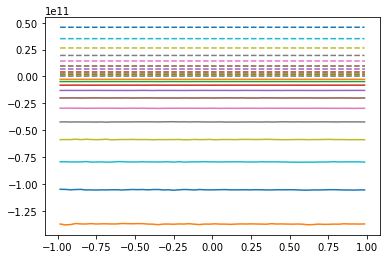

In [90]:
plt.plot(mu_bins,RRR_compress_SE_mu.T,ls='--')
plt.plot(mu_bins,RRR_compress_ras.T);

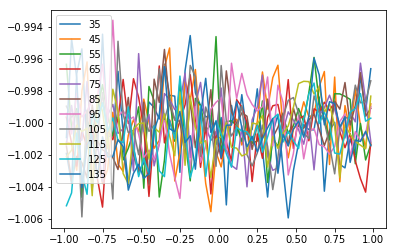

In [91]:
for i in range(len(RRR_compress_ras)):
    plt.plot(mu_bins,3*RRR_compress_SE_mu[i]/RRR_compress_ras[i],label=r'%d'%r_bins[i]);
plt.legend();

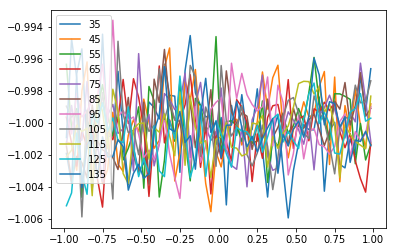

In [92]:
for i in range(len(RRR_compress_ras)):
    plt.plot(mu_bins,3*RRR_compress_SE_mu[i]/RRR_compress_ras[i],label=r'%d'%r_bins[i]);
plt.legend();

### Create periodic dataset for testing

In [64]:
boxside = 1000
n_rand = int(2e5)
w = np.ones([n_rand,1])
rand_par = np.random.uniform(size=(n_rand,3))*boxside
rand_all = np.hstack([rand_par,w])

In [65]:
np.savetxt('/mnt/store1/oliverphilcox/3PCF_test/rand_periodic_box.txt',rand_all)